In [1]:
import os
import re
import scipy
from scipy import stats
import pickle
import subprocess
import shlex
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train_df = pd.read_csv('median_icumean_train.csv')
X_test_df = pd.read_csv('median_icumean_test.csv')
X_holdout_df = pd.read_csv('median_icumean_holdout.csv')

print(X_train_df.shape)
print(X_test_df.shape)
print(X_holdout_df.shape)

(14283, 67)
(4080, 67)
(2041, 67)


In [3]:
# splitting into X and Y

X_features_to_drop = ['id', 'los_icu', 'icu_death', 'hosp_admittime', 'hosp_dischtime', 'icu_intime', 'icu_outtime', 'icu_outcome']

y_train = X_train_df.los_icu
X_train = X_train_df.drop(columns=X_features_to_drop)

y_test = X_test_df.los_icu
X_test = X_test_df.drop(columns=X_features_to_drop)

y_holdout = X_holdout_df.los_icu
X_holdout = X_holdout_df.drop(columns=X_features_to_drop)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(X_holdout.shape)
print(y_train.shape)
print(y_test.shape)
print(y_holdout.shape)

(14283, 59)
(4080, 59)
(2041, 59)
(14283,)
(4080,)
(2041,)


In [5]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.columns[X_train.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# print(num_cols)
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_holdout[num_cols] = scaler.transform(X_holdout[num_cols])

In [6]:
X_train.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,...,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04,1.428300e+04
mean,1.333231e-16,3.900200e-16,-1.349399e-16,-2.243112e-15,9.452014e-18,1.079520e-16,-5.248355e-17,8.606308e-17,-3.830553e-17,-1.144191e-17,...,3.733546e-16,1.294926e-15,2.666463e-15,-2.168989e-16,4.716058e-16,-1.412827e-16,-8.457065e-17,-7.959591e-18,-1.223787e-16,3.487296e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,...,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.134993e+00,-3.154836e+00,-2.945018e+00,-6.026749e+00,-1.986933e+00,-6.044477e-01,-3.850239e-01,-7.246701e-01,-8.617885e-01,-3.565539e-01,...,-5.761772e+00,-5.212526e+00,-6.198320e+00,-2.000702e+00,-3.505255e+00,-2.198051e+00,-1.409709e+00,-1.153236e+00,-1.187113e+00,-1.425380e+00
25%,-1.134993e+00,-6.290281e-01,-5.882715e-01,-2.208599e-01,-6.190716e-01,-6.044477e-01,-3.850239e-01,-7.246701e-01,-8.617885e-01,-3.565539e-01,...,-4.677149e-01,-5.784714e-01,-5.621310e-01,-5.720412e-01,-6.417632e-01,-6.427822e-01,-4.227434e-01,-4.041372e-01,-3.958421e-01,-4.441161e-01
50%,8.810628e-01,8.353260e-02,-1.343797e-01,3.157000e-02,6.485923e-02,-6.044477e-01,-3.850239e-01,-7.246701e-01,-8.617885e-01,-3.565539e-01,...,5.515494e-02,2.808018e-02,-7.344411e-02,-1.479618e-01,-8.945758e-02,-1.737328e-01,-1.655340e-01,-2.070059e-01,-2.345638e-01,-2.517114e-01
75%,8.810628e-01,7.490788e-01,4.277480e-01,3.157000e-02,7.487901e-01,1.654403e+00,-3.850239e-01,1.379938e+00,1.160378e+00,-3.565539e-01,...,5.243373e-01,5.921732e-01,4.966906e-01,3.664952e-01,5.733092e-01,4.352086e-01,2.212769e-01,-4.930083e-02,-4.808586e-02,-2.082578e-02
max,8.810628e-01,2.104103e+00,3.228397e+01,4.196664e+00,3.826479e+00,1.654403e+00,2.597241e+00,1.379938e+00,1.160378e+00,2.804625e+00,...,5.730471e+00,5.195900e+00,6.401657e+00,1.132130e+01,5.688509e+00,9.306003e+00,3.559853e+01,1.737711e+01,1.813226e+01,8.714347e+00


In [7]:
X_test.describe()

,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,...,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000,4080.000000
mean,-0.010844,-0.010256,-0.005270,-0.018058,-0.030941,0.006771,-0.010048,0.000079,0.010023,0.001403,...,0.013606,0.017951,0.006273,0.019893,0.016688,-0.020015,0.030381,0.035645,0.029947,0.026353
std,1.001440,0.993147,0.931224,1.001911,0.985703,1.003648,0.988894,1.000148,1.001568,1.001838,...,1.030755,1.012629,1.033956,0.997434,1.020633,1.008651,1.106378,1.093530,1.060812,1.046085
min,-1.134993,-3.110516,-2.945018,-5.395674,-1.986933,-0.604448,-0.385024,-0.724670,-0.861788,-0.356554,...,-5.979635,-4.703022,-5.123209,-1.979846,-3.006764,-2.074617,-1.409709,-1.153236,-1.182793,-1.436924
25%,-1.134993,-0.651561,-0.606602,-0.220860,-0.619072,-0.604448,-0.385024,-0.724670,-0.861788,-0.356554,...,-0.457730,-0.572406,-0.562131,-0.547709,-0.633266,-0.655743,-0.412774,-0.364711,-0.385762,-0.436420
50%,0.881063,0.070605,-0.134380,0.031570,0.064859,-0.604448,-0.385024,-0.724670,-0.861788,-0.356554,...,0.062417,0.028080,-0.073444,-0.139272,-0.089458,-0.198420,-0.145097,-0.207006,-0.234564,-0.251711
75%,0.881063,0.739906,0.441714,0.031570,0.748790,1.654403,-0.385024,1.379938,1.160378,-0.356554,...,0.556239,0.628566,0.578138,0.413422,0.590303,0.399310,0.247197,-0.049301,-0.022886,0.009959
max,0.881063,2.091408,14.477447,4.827739,3.484513,1.654403,2.597241,1.379938,1.160378,2.804625,...,5.596123,4.176893,6.523829,7.707935,5.127706,9.009762,44.840118,14.774972,15.059149,8.714347


# XGBoost Regressor

In [9]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_regressor = XGBRegressor(learning_rate=0.35, max_depth=6, n_estimators=50)
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 35.59783473121595


In [17]:
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: -0.0032807513834332003


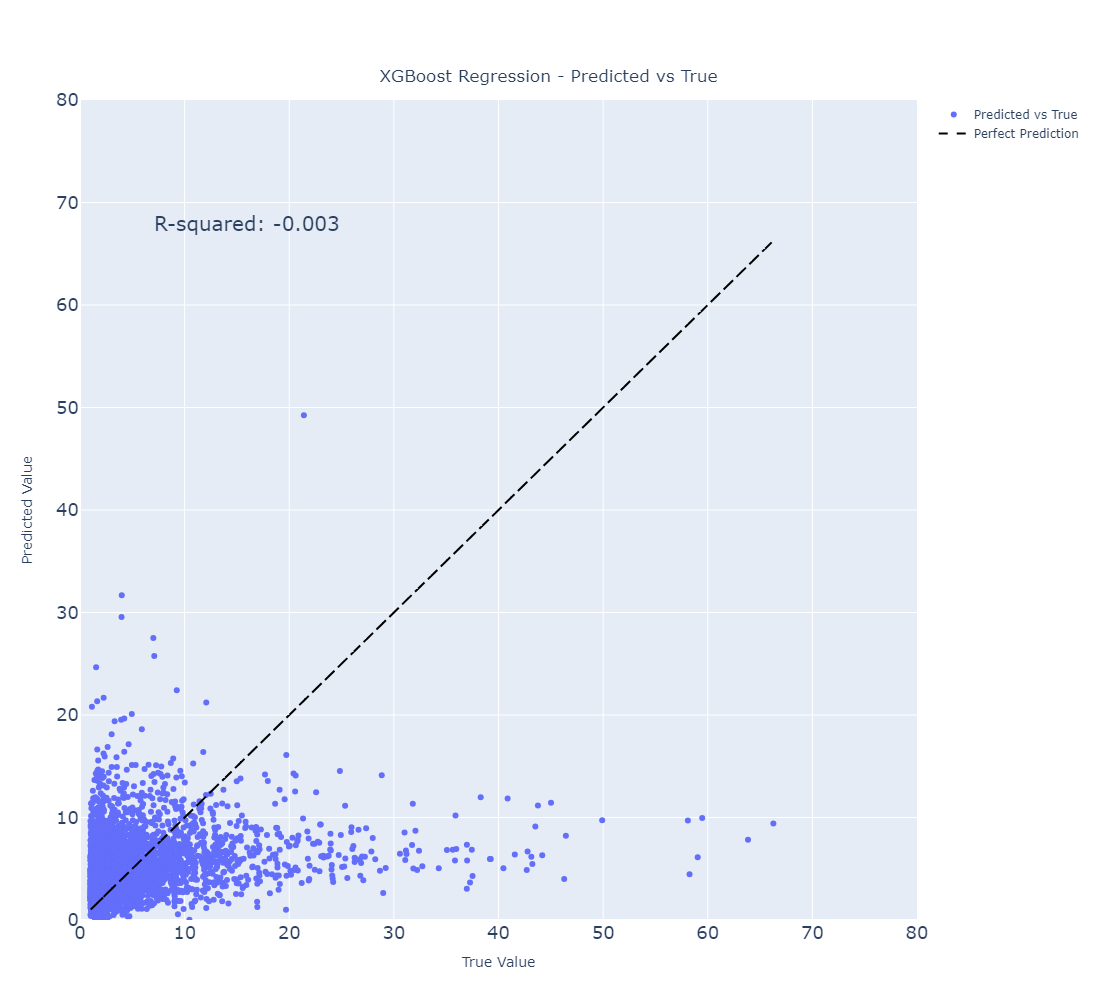

In [35]:
import plotly.graph_objects as go
from sklearn.metrics import r2_score

# Calculate R-squared value
r_squared = r2_score(y_test.squeeze(), y_pred.squeeze())

# Create figure
fig = go.Figure()

# Add scatter plot
fig.add_trace(go.Scatter(
    x=y_test.squeeze(),
    y=y_pred.squeeze(),
    mode='markers',
    name='Predicted vs True'
))

# Add diagonal line
fig.add_trace(go.Scatter(
    x=y_test.squeeze(),
    y=y_test.squeeze(),
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='black', dash='dash')
))

# Update axis titles
fig.update_xaxes(title='True Value', title_font=dict(size=40))
fig.update_yaxes(title='Predicted Value', title_font=dict(size=40))

fig.update_xaxes(title='True Value', range=[0, 80])
fig.update_yaxes(title='Predicted Value', range=[0, 80])

fig.update_xaxes(tickfont=dict(size=18))
fig.update_yaxes(tickfont=dict(size=18))

# Add R-squared annotation
fig.add_annotation(
    x=16,
    y=68,
    text=f'R-squared: {r_squared:.3f}',
    showarrow=False,
    font=dict(size=20)
)

# Add title
fig.update_layout(title="XGBoost Regression - Predicted vs True", title_x=0.5, title_y=0.93)
# Update layout to adjust the height
fig.update_layout(height=1000)  # Adjust the height as needed

# Show figure
fig.show()